# Monte Carlo Methods

In this assignment, we implement first-visit MC prediction for a given policy and also epsilon-greedy MC control for learning policies.

In terms of reinforcement learning, a Monte Carlo (MC) method samples experiences/episodes and updates some metrics (say state value) for different states and actions.

## First Visit MC Prediction

In order to estimate state values for a fixed policy $\pi$, each state value $V^\pi(s)$ is estimated using a MC method. The basic idea is as follows: 
- Sample a finite-horizon episode $E$
- For each state $s \in S$, estimate $V^\pi(s)$ after first visit to state within episode

An episode $E$ looks like $s_0, a_0, r_1, s_1, a_1, r_2, ... , s_{T−1}, a_{T−1}, r_T$. That is, taking action $a_i$ in state $s_i$ results in reward $r_{i+1}$. Note that the episode terminates at state $s_{T−1}$.

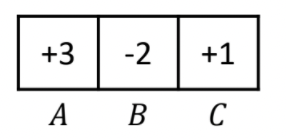

Let us consider the mini-gridworld example again. Consider a grid with 
- Three states $S$: A, B, C
- Reward for entering each states as +3, -2, +1, respectively

For each state $s$ in $E$, we
- Calculate average discounted return $G$ following the first occurence of $s$: $G \gets \sum \gamma^i r_{i+1}$
- Update $V^\pi(s)$ using $G$

#### Note: Please do not modify any pre-defined variables. Doing so can affect the autograder results.

In [ ]:
# problem constants

S = ['A', 'B', 'C']
discount = 0.8 # gamma/discount

episodes = [
    ['A', 3, 'A', -2,'B', 1, 'C', -2, 'B', 3],
    ['A', -2, 'B', 3, 'A', -2,'B', 1, 'C', -2],
    ['C', 1, 'C', -2,'B', 3, 'A', -2,'B', 3]
]

In [ ]:
# helper method to check if value a is approximately equal to b
def isclose(a, b):
    return abs(a-b) < 1e-2

First we implement a helper method to find $G$, the discounted future return given an episode.

In [ ]:
def discounted_return(state, episode):
    G = 0
    
    started_adding = False
    current_discount = 1
    
    for e in episode:
        if e == state and not started_adding:
            started_adding = True
        
        if e not in S and started_adding:
            # e is a reward
            
            # update G here
            # your code here
            
            
            # update current_discount
            # your code here
            
    
    return G

Let's do a basic check before proceeding into MC prediction.

In [ ]:
assert isclose(discounted_return('A', episodes[0]), 2.244)
assert isclose(discounted_return('B', episodes[0]), 1.32)
assert isclose(discounted_return('C', episodes[0]), 0.4)

Now we use the discounted returns to estimate state values.

In [ ]:
def value_estimation(episodes):
    V = {
        'A': 0,
        'B': 0,
        'C': 0,
    }
    
    for s in S:
        Gs = []
        
        for e in episodes:
            G = None
            
            # use the method defined above to find G
            # your code here
            
            
            Gs.append(G)
            
        # take an average of discounted return of all the episodes
        V[s] = None
        
        # your code here
        
    
    return V

In [ ]:
V = value_estimation(episodes)
assert isclose(V['A'], 0.48)
assert isclose(V['B'], 1.89)
assert isclose(V['C'], -0.03)

In [ ]:
# hidden tests

In [ ]:
# hidden tests